In [2]:
#Libraries
import os
import pandas as pd
import numpy as np
import keras
import tensorflow
import sklearn
from matplotlib import pyplot as plt
import sys
import surfboard
from surfboard.feature_extraction import extract_features

Using TensorFlow backend.


In [91]:
#Misc. adjustments
pd.set_option('max_colwidth', 200)

In [116]:
#Listing files
filelist = os.listdir("Source/Gaby")

#Read files into pandas
source = pd.DataFrame(filelist)

#Rename file name column
source = source.rename(columns={0:'file'})

#Display files
source

,file
0,05-11.wav
1,05-05.wav
2,15-14.wav
3,15-15.wav
4,15-01.wav
...,...
78,05-21.wav
79,15-18.wav
80,15-19.wav
81,05-20.wav


In [117]:
#Extraction of variables from filenames
speaker_id = []

for i in range (0, len(source)):
    id = source["file"][i][0:2]
    if id[0:1] == "0":
        speaker_id.append(id[1])
    else:
        speaker_id.append(id)
    
#Adding variables to dataframe
source["id"] = speaker_id

source

,file,id
0,05-11.wav,5
1,05-05.wav,5
2,15-14.wav,15
3,15-15.wav,15
4,15-01.wav,15
...,...,...
78,05-21.wav,5
79,15-18.wav,15
80,15-19.wav,15
81,05-20.wav,5


In [148]:
#Create training & valuation dataframes
train = pd.DataFrame()
val = pd.DataFrame()

for i in (3, 15, 5, 11):
    tmp = source[(source.id==str(i))]
    train_tmp = tmp.sample(10)
    val = val.append(tmp.drop(train_tmp.index))
    train = train.append(train_tmp)

train = train.reset_index()
train.file = os.path.join(sys.path[0], "Source/Gaby/") + train.file 
val = val.reset_index()
val.file = os.path.join(sys.path[0], "Source/Gaby/") + val.file 

train_files = train.file.tolist()
val_files = val.file.tolist()

In [149]:
#Feature extraction function using surfboard
def feature_extract(files):
    features = surfboard.feature_extraction.extract_features_from_paths(files, ["mfcc", 'f0_statistics', 'formants'], statistics_list=['mean'], sample_rate=44100)
    return features

In [150]:
#Extract features
features_train = feature_extract(train_files)
features_val = feature_extract(val_files)
features_train


Extracting features from paths...: 100%|██████████| 40/40 [00:09<00:00,  4.02it/s]

Extracting features from paths...: 100%|██████████| 42/42 [00:10<00:00,  4.15it/s]


,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,f0_mean,f0_std,f1,f2,f3,f4
0,-561.384521,88.629105,20.023294,15.797243,16.180128,20.376467,0.673888,7.577013,5.520364,-11.616729,0.544192,-4.872524,-2.934813,99.042466,16.513333,327.553517,1127.481921,2573.594948,3396.998345
1,-566.866943,88.278412,16.918081,11.001801,13.113670,12.134033,-5.097696,4.440250,5.571109,-7.791466,1.766070,-3.532473,0.050146,97.549144,9.802329,1474.991906,2310.997642,3447.781156,4185.282340
2,-580.831116,65.595749,17.076706,11.733352,11.956792,13.905425,-1.911936,7.533554,3.427717,-3.472837,1.360424,-0.806937,1.035724,94.531668,9.762265,1305.070787,2437.802187,3376.802105,4199.542884
3,-538.853455,99.190483,8.682883,14.707028,22.899086,17.596498,-2.658870,8.363273,4.948030,-10.862589,1.360627,-7.239413,-2.821583,95.876314,10.347329,1288.620201,2419.535720,3689.696411,4320.101337
4,-572.520264,82.738800,22.575155,22.859806,23.543818,13.136890,-7.467895,6.302081,5.435447,-5.912426,1.640987,-5.953146,0.623375,98.609640,12.956414,444.563327,1654.936458,2477.992103,3639.807355
5,-564.340027,81.028130,22.583153,22.361893,14.503494,12.864532,-2.113703,11.075768,5.781444,-11.161592,0.158681,-3.112166,-0.956047,96.323614,14.188558,1143.473355,2767.755610,3728.739169,4309.986316
6,-534.262695,89.209518,2.840919,19.995979,28.981230,24.216671,-6.305110,7.097983,0.640666,-9.969707,2.898630,-8.331562,-3.132794,97.749099,15.597897,1895.996400,2633.751967,3477.223886,4477.312606
7,-494.560913,94.888290,15.595440,13.456922,7.838867,10.851201,-8.263854,11.034275,0.248587,-11.796926,-4.865121,-3.888509,-2.179275,94.475513,13.043903,1324.301631,2652.198854,3463.760041,4461.132122
8,-598.398743,60.839153,16.079908,21.015945,17.508152,13.131413,0.921918,8.843516,5.904404,-6.810877,3.185882,-4.353019,-0.574865,94.544283,8.890051,2332.051279,3545.224583,4447.936550,4850.747541
9,-592.541382,79.108757,22.084448,13.432527,13.090157,8.772463,-0.592872,5.988107,6.961747,-8.630990,-1.276580,-3.629971,-0.771177,104.220239,19.376043,1017.245874,2236.636924,3180.466687,4279.185322


In [151]:
#Create feature maps
X_train = np.array(features_train)
X_val = np.array(features_val)

In [152]:
#Create classification maps
y_train = np.array(train["id"])
y_val = np.array(val["id"])

In [153]:
#Encoding classficiations
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_val = to_categorical(lb.fit_transform(y_val))

In [154]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
#X_test = ss.transform(X_test)

In [155]:
#Create Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(19, input_shape=(19,), activation = 'relu'))
#model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [156]:
#Train Neural Network
history = model.fit(X_train, y_train, batch_size=20, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop], verbose = 0)

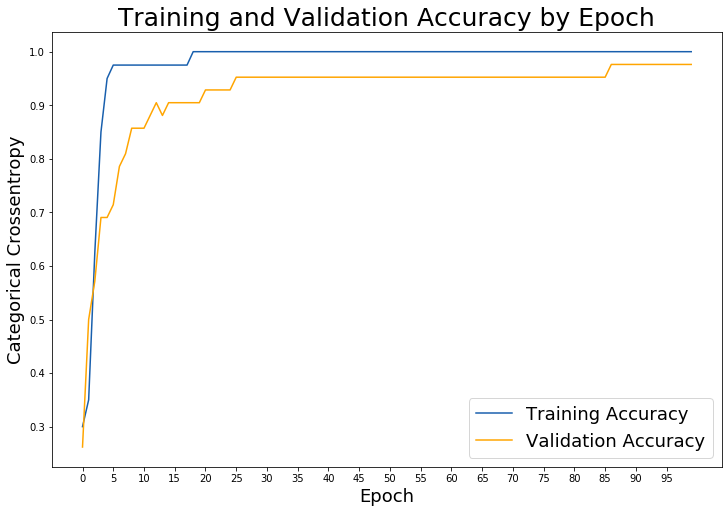

In [157]:
# Check train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']# Set figure size.
plt.figure(figsize=(12, 8))# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18);